# Simple Wine Quality Classifier on Wine Quality Dataset

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('../data/winequality-white.csv', delimiter=';')

# Analyze Train Dataset

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.shape

(4898, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Correlation map between features

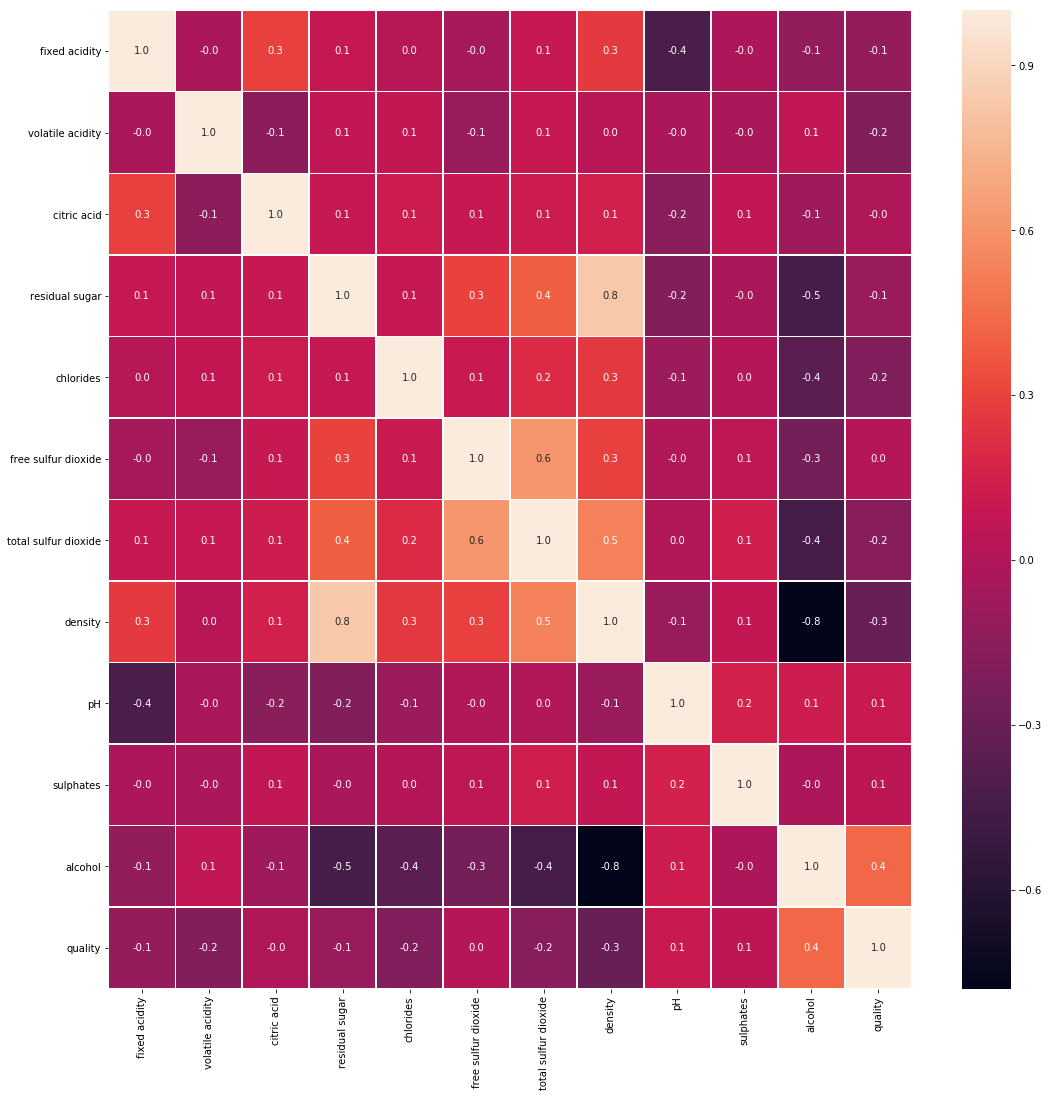

In [7]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

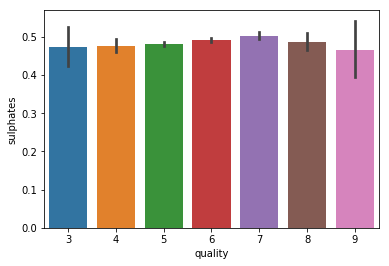

In [8]:
# Quality vs Sulphates barplot
sns.barplot(x = 'quality', y  = 'sulphates', data = df )

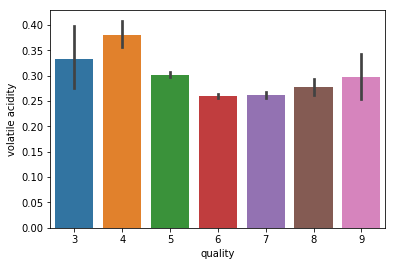

In [9]:
# Quality vs volatile acidity barplot
sns.barplot(x = 'quality', y  = 'volatile acidity', data = df )

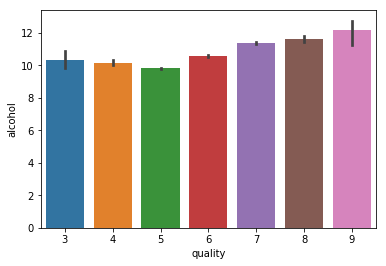

In [10]:
# Quality vs Alcohol barplot
sns.barplot(x = 'quality', y  = 'alcohol', data = df )

### Count number of instances for each quality

In [11]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

# Categorize Quality label

In [12]:
df_cat = df.copy()

bins = (df_cat['quality'].min(),6.5,df_cat['quality'].max())
group_names = ['bad','good']
categories = pd.cut(df_cat['quality'], bins, labels = group_names)
df_cat['quality'] = categories

In [13]:
df_cat['quality'].value_counts()

bad     3818
good    1060
Name: quality, dtype: int64

### Barplots after categorigation

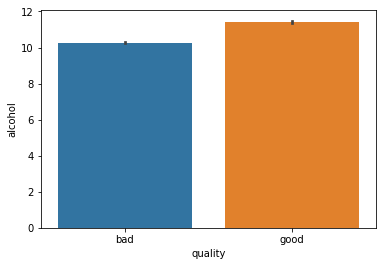

In [14]:
sns.barplot(x='quality', y='alcohol',data=df_cat)

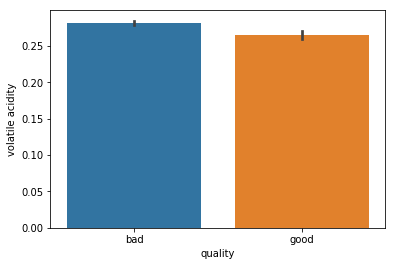

In [15]:
sns.barplot(x='quality', y='volatile acidity',data=df_cat)

# Create Features and Label Splits

In [16]:
X= df_cat.drop(['quality'], axis=1)
y = df_cat['quality']
# y.head()
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4878 non-null category
dtypes: category(1), float64(11)
memory usage: 425.9 KB


### Encoding dependent variable - Quality

In [17]:
# bad = 0, good = 1
y = y.cat.codes
df_cat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,bad
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad


# Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape, X_test.shape)

(3918, 11) (980, 11)


# Feature Scaling to X_train and X_test to classify better.

In [19]:
fsc = StandardScaler()
X_train = fsc.fit_transform(X_train)
X_test = fsc.transform(X_test)

In [20]:
models = []

models.append(("Logistic Regression:", LogisticRegression()))
models.append(("K-Nearest Neighbour:", KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree Classifier:", DecisionTreeClassifier()))
models.append(("Random Forest Classifier:", RandomForestClassifier(n_estimators=64)))
models.append(("MLP:", MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("GradientBoostingClassifier:", GradientBoostingClassifier()))
models.append(("SVC:", SVC(kernel = 'rbf', random_state = 0)))

print('Models appended...')

Models appended...


In [21]:
def run_models():
    results = []
    names = []
    for name,model in models:
        cv_result = cross_val_score(model, X_train, y_train.values.ravel(), cv = 10, scoring = "accuracy")
        names.append(name)
        results.append(cv_result)
    for i in range(len(names)):
        print(names[i],results[i].mean()*100)

# Function to run the Models with Cross Validation

In [22]:
run_models()

Logistic Regression: 79.3548044483
K-Nearest Neighbour: 81.6767070381
Decision Tree Classifier: 81.776594449
Random Forest Classifier: 87.1356613339
MLP: 82.009517075
GradientBoostingClassifier: 82.312832685
SVC: 81.7523208931


### In this very simple Classifier without any preprocessing Random Forest has been performing the best with **87.49** % accuracy. 

# Grid search for best model and parameters

In [23]:
models_gs = {
    'K-Nearest Neighbour': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params_gs = { 
    'K-Nearest Neighbour': {'n_neighbors':[3, 5, 8]},
    'Decision Tree Classifier': {'max_depth': [8, 16, 32]},
    'RandomForestClassifier': { 'n_estimators': [32, 64, 128] },
    'GradientBoostingClassifier': { 'n_estimators': [128, 256, 512], 'learning_rate': [0.05, 0.1, 0.3, 0.9] },
    'SVC': [
#         {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
        {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.3, 0.7, 0.9, 1.0]},
    ]
}

In [24]:
def run_models_with_GS(models_gs, params_gs):
    results = []
    for model in models_gs:
        grid_search = GridSearchCV(estimator = models_gs[model],
                                   param_grid = params_gs[model],
                                   scoring = 'accuracy',
                                   cv = 10, n_jobs = 6)
        grid_search.fit(X_train, y_train)
        best_accuracy = grid_search.best_score_
        best_parameters = grid_search.best_params_
        #here is the best accuracy
        results.append(( model, best_accuracy, best_parameters ))
    return results

In [25]:
results = run_models_with_GS(models_gs, params_gs)
for model, accuracy, params in results:
    print(model, accuracy * 100, params)

K-Nearest Neighbour 82.2868810618 {'n_neighbors': 8}
Decision Tree Classifier 81.7508933129 {'max_depth': 32}
RandomForestClassifier 86.8300153139 {'n_estimators': 128}
GradientBoostingClassifier 85.911179173 {'learning_rate': 0.3, 'n_estimators': 512}
SVC 85.4517611026 {'C': 10, 'gamma': 0.9, 'kernel': 'rbf'}


### Best Results
- K-Nearest Neighbour **82.8739152629** {'n_neighbors': 8}
- Decision Tree Classifier **81.2404287902** {'max_depth': 32}
- RandomForestClassifier **87.1362940276** {'n_estimators': 128}
- GradientBoostingClassifier **85.0944359367** {'learning_rate': 0.3, 'n_estimators': 256}
- SVC **86.089841756** {'C': 10, 'gamma': 0.9, 'kernel': 'rbf'}


